# Estudo do Mercado Financeiro (Bancos) - Este notebook utiliza a biblioteca yfinance e outras para analista algumas ações da bolsa de valores

### Site:       https://filipedeabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7                                     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
#Função que retorna informações de um papel com base no input de um usuário
def cria_dataframe(acao, periodo):
    acao_santander =  yf.Ticker(acao)
    data = acao_santander.history(period=periodo)
    return data

### Cnsultando a ação do <font color='red'> Santander </font> ('SANB11.SA') no período de 1 ano ('1y')

In [5]:
df_santander = cria_dataframe('SANB11.SA','1y') #Selecionado a ação do santander, no periodo de 1 ano
df_santander.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-01 00:00:00-03:00,25.513868,25.939257,25.447696,25.712383,2652900,0.0,0.0
2023-11-03 00:00:00-03:00,26.260663,26.430817,26.109414,26.241756,5541900,0.0,0.0
2023-11-06 00:00:00-03:00,26.326834,26.421366,26.081054,26.241756,1824600,0.0,0.0
2023-11-07 00:00:00-03:00,26.260664,26.931832,26.194491,26.884567,2709000,0.0,0.0
2023-11-08 00:00:00-03:00,27.035815,27.593547,26.969644,27.574640,1854200,0.0,0.0
2023-11-09 00:00:00-03:00,27.792063,27.933858,27.432846,27.612453,1610100,0.0,0.0
2023-11-10 00:00:00-03:00,27.905499,28.434871,27.489562,28.236357,2451800,0.0,0.0
2023-11-13 00:00:00-03:00,28.151279,28.425417,27.924405,28.425417,1253600,0.0,0.0
2023-11-14 00:00:00-03:00,28.586120,29.115492,28.122919,29.115492,2109900,0.0,0.0


### Extraindo algumas informações básicas do dataset

In [7]:
df_santander.info() #tipos de dados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-01 00:00:00-03:00 to 2024-11-01 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    float64
 6   Stock Splits  253 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [15]:
print(f'Numero de observações: {df_santander.shape[0]} \nNúmero de variáveis: {df_santander.shape[1]}')  #formato

Numero de observações: 253 
Número de variáveis: 7


### Um pouco de estatística descritiva básica

In [42]:
df_santander_descritivo = df_santander.describe()

#Renomeando o index
df_santander_descritivo.index = ['Contagem','Média','Desvio Padrão', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo']

#Defining o numero de casas decimais para 3
pd.set_option('float.format','{:.3f}'.format)

#Printando o novo data set
df_santander_descritivo

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Contagem,253.000,253.000,253.000,253.000,253.000,253.000,253.000
Média,28.138,28.410,27.871,28.139,2672597.233,0.006,0.000
Desvio Padrão,1.338,1.351,1.336,1.344,4538007.966,0.050,0.000
Mínimo,25.475,25.840,25.370,25.418,0.000,0.000,0.000
1° Quartil,27.123,27.413,26.907,27.095,1462100.000,0.000,0.000
2° Quartil,27.928,28.330,27.737,27.987,1966000.000,0.000,0.000
3° Quartil,28.974,29.276,28.709,28.926,2940600.000,0.000,0.000
Máximo,31.199,31.534,31.071,31.327,71189700.000,0.403,0.000


### Algumas informações gráficas simples

In [81]:
df_santander['Close'].max() + 1

32.327402114868164

Text(2024-07-29 00:00:00-03:00, 28.239247977215314, 'Média')

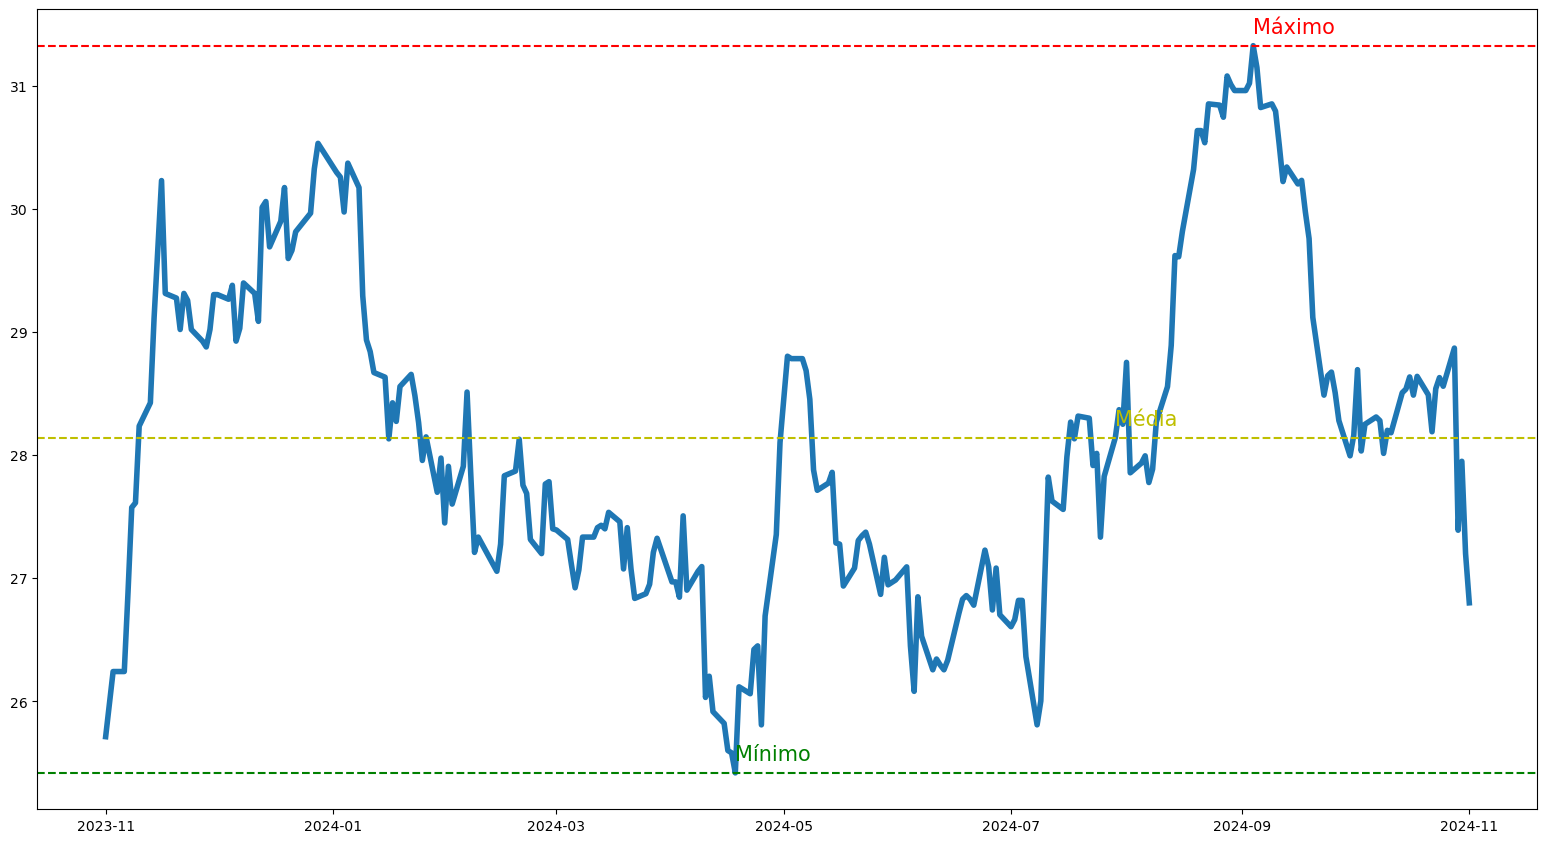

In [97]:
#Analisando apenas a variable "Close"

#Plotando um graáfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_santander.index, df_santander['Close'], linewidth=4)

#Traçando uma linha rente ao valor maximo ja atingido lo papel
ax.axhline(df_santander['Close'].max(), c= 'r', ls = '--')
ax.annotate("Máximo", 
            (df_santander['Close'].idxmax(), df_santander['Close'].max() + 0.1),
            fontsize=15,
            c= 'r'
           )

#Traçando uma linha rente ao valor mínimo ja atingido lo papel
ax.axhline(df_santander['Close'].min(), c='g', ls = '--')
ax.annotate("Mínimo", 
            (df_santander['Close'].idxmin(), df_santander['Close'].min() + 0.1),
            fontsize=15,
            c='g'
           )

#Traçando uma linha rente a média ja atingido lo papel
ax.axhline(df_santander['Close'].mean(), c='y', ls = '--')
ax.annotate("Média", 
            ((df_santander['Close'] - df_santander['Close'].mean()).abs().idxmin(), df_santander['Close'].mean() + 0.1),
            fontsize=15,
            c='y'
           )


<Axes: xlabel='Close', ylabel='Count'>

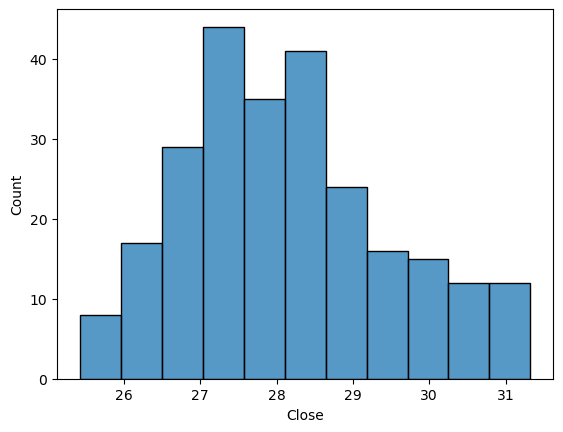

In [99]:
#Analisando a distribuição
sns.histplot(df_santander['Close'])